In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
a = """10.32(4.156)
19.62(4.038)
2.36(4.191)
-0.8(4.286)
-12.34(4.009)
11.27(3.875)
31.59(4.059)
-3.88(4.077)
10.55(3.966)
-10.7(4.064)
4.3(4.016)
10.95(4.229)
11.87(4.118)
13.47(3.97)
16.57(4.039)
14.19(3.948)
11.63(4.268)
20.35(4.165)
20.71(4.367)
20.44(3.989)
24.82(4.213)
14.39(3.932)
11.35(4.241)
5.73(4.055)
12.24(3.962)
9.34(4.222)
20.89(4.27)
10.95(4.029)
5.22(4.256)
25.56(3.98)
-7.1(4.232)
22.3(3.912)
13.17(4.036)
19.62(3.92)
14.04(4.116)
16.0(4.274)
-9.74(4.036)
8.04(4.08)
16.34(4.27)
9.59(3.496)
10.86(4.284)
7.9(4.252)
-12.35(4.411)""".split('\n')
a = np.abs([float(i.split('(')[0]) for i in a])

In [3]:
b = pd.read_csv('../../../../chicken_epistasis/data/results/20210413_allFDR_peaks.csv', index_col=0)

In [4]:
b['gram']=a

In [5]:
sig = b.loc[b['lod']>=4.01]

In [6]:
sig = sig.sort_values(by='gram', ascending=False)

In [7]:
sug = b.loc[(b['lod']<4.01)&(b['lod']>=2.86)]
sug = sug.sort_values(by='gram', ascending=False)

In [8]:
fdr = b.loc[(b['lod']<2.86)&(b['reject10']==True)]
fdr = fdr.sort_values(by='gram', ascending=False)

In [9]:
sig_col = sns.palettes.color_palette('Reds_r',20 )[:12]

sug_col = sns.palettes.color_palette('Blues_r',18 )[:9]
fdr_col = sns.palettes.color_palette('Greens_r',30 )[:21]

In [10]:
sig_col = sns.palettes.color_palette('plasma',20 )[8:]

sug_col = sns.palettes.color_palette('viridis',18 )[9:]
fdr_col = sns.palettes.color_palette('bone',30 )[9:]

In [11]:
labels = ['' for i in list(sig['gram'])+list(sug['gram'])+list(fdr['gram'])]+['']

In [12]:
WB_gram = [159,0.001,67.6,0.001,1114]
WB_col = [sig_col[0],sig_col[0],sug_col[0],sug_col[0],'lightgrey']

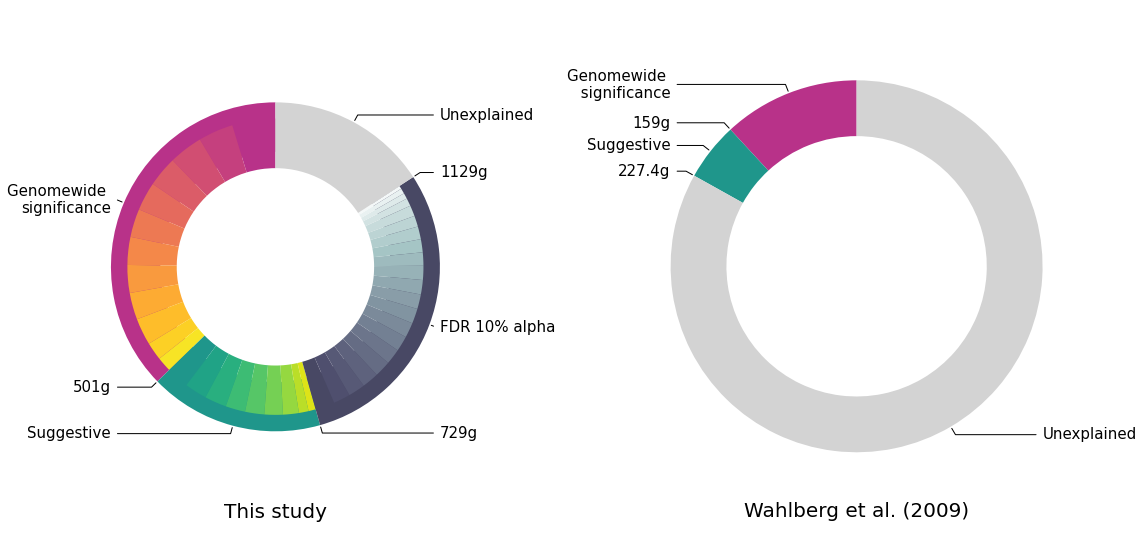

In [13]:
fig, (ax,ax1) = plt.subplots(ncols=2, nrows=1, figsize=(16,8))

labels = ["Genomewide \nsignificance",
          '501g',
          "Suggestive",
          '729g',
          "FDR 10% alpha",
          '1129g',
          "Unexplained"]


#c1 = plt.Circle((0, 0), 0.8, color='white')
#c2 = plt.Circle((0, 0), 0.8, color='white')

f_col = [sig_col[0],sig_col[0],sug_col[0],sug_col[0],fdr_col[0],'lightgrey','lightgrey']
#my_circle2 = ax1.Circle((0, 0), 0.7, color='white')

wedges, texts = ax.pie([sum(sig['gram']*2),0.001,sum(sug['gram']*2),0.001,sum(fdr['gram']*2)]+[0.001,212],
            startangle=90, labeldistance=1.0, colors=f_col, radius=1, wedgeprops=dict(width=0.3))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")


for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.0*np.sign(x), 1.05*y),
                horizontalalignment=horizontalalignment,fontsize=15, **kw)


ax.pie(list(sig['gram']*2)+list(sug['gram']*2)+list(fdr['gram']*2)+[212],
            startangle=90, labeldistance=1.0, radius=0.9, colors=sig_col+sug_col+fdr_col+['lightgrey'],wedgeprops=dict(width=0.3))



wedges2, texts2 = ax1.pie(WB_gram, startangle=90, labeldistance=0.7, colors=WB_col, radius=1,wedgeprops=dict(width=0.3) )
#ax.pie(WB_gram_lines, startangle=90, labeldistance=1.0, colors=WB_col_lines, radius=0.6)
labels2 = ['Genomewide \n significance','159g', 'Suggestive','227.4g', 'Unexplained']

for i, p in enumerate(wedges2):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(labels2[i], xy=(x, y), xytext=(1*np.sign(x), 1.05*y),
                horizontalalignment=horizontalalignment,fontsize=15, **kw)


plt.axis('equal')
#ax.add_patch(c1)
#ax1.add_patch(c2)
ax.set_xlabel('This study', size=20, labelpad=30)
ax1.set_xlabel('Wahlberg et al. (2009)', size=20, labelpad=-25)

#plt.gca().add_artist(my_circle)
plt.tight_layout()
plt.savefig('../results/figures/20210601_piechart_of_line_diff.eps')
plt.savefig('../results/figures/20210601_piechart_of_line_diff.pdf')
plt.savefig('../results/figures/20210601_piechart_of_line_diff.png')

plt.show()


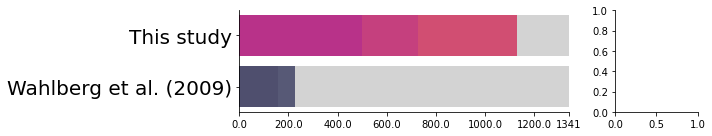

In [63]:
fig, (ax,ax2)  = plt.subplots(ncols=2, nrows=1, figsize=(10,2),gridspec_kw={'width_ratios':(8,2)})

1341
ax.barh([2,1], [1341,1341], color='lightgrey')
ax.set_yticks([1,2])
ax.set_yticklabels(['Wahlberg et al. (2009)', 'This study'], size=20)

ax.barh([2], [1129],color=sig_col[2])

ax.barh([2,1], [729,227],color=[sig_col[1],fdr_col[2]])
ax.barh([2,1], [501,159],color=[sig_col[0],fdr_col[1]])

#ax.axvline(x=1341, lw=2, color='black')
#ax.text(x=1380, y=1.5,s='1341g')
#ax.set_xticks(ax.get_xticks())


xt = ax.get_xticks() 
xt=np.append(xt,1341)

xtl=xt.tolist()
xtl[-1]="1341"
ax.set_xticks(xt)
ax.set_xticklabels(xtl)
ax.set_xlim(0,1343)

sns.despine()
plt.tight_layout()
plt.show()

(0.0, 33.1295)

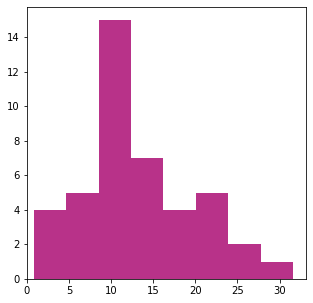

In [41]:
fig, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(5,5))
#sns.distplot(a, ax=ax2, color=sig_col[0])
ax2.hist(a, bins=8, color=sig_col[0])
ax2.set_xlim(0,)


In [121]:
sum(list(sig['gram'])+list(sug['gram']))*2

729.3800000000001

In [138]:
b

,chr,pos,lod,loc,reject05,reject01,reject20,reject10,gram
marker,,,,,,,,,
1-35,1,121.528838,1.764970,35,False,False,True,True,10.32
1-56,1,188.982906,5.788269,56,True,True,True,True,19.62
1-79,1,278.916721,1.798839,79,False,False,True,True,2.36
1-85,1,311.542504,0.079645,85,False,False,False,False,0.80
1-93,1,353.513771,2.143896,93,True,False,True,True,12.34
1-132,1,513.627022,2.457191,132,True,False,True,True,11.27
1-171,1,668.455211,13.077210,171,True,True,True,True,31.59
1-185,1,742.800321,1.730548,185,False,False,True,True,3.88
2-5,2,50.364060,1.732339,204,False,False,True,True,10.55


In [122]:
1341 - sum(list(sig['gram'])+list(sug['gram'])+list(fdr['gram']))*2

211.70000000000005

In [124]:
sum(list(sig['gram'])+list(sug['gram'])+list(fdr['gram']))*2/1341

0.8421327367636092

In [142]:
sum(list(sig['gram'])+list(sug['gram']))*2

729.3800000000001

In [145]:
sum(sig['gram']*2)

499.86

In [21]:
WB_gram = [159,0.001,67.6,0.001,1114]
WB_gram_lines = [158,2,68.6,2,1112]

In [148]:
WB_gram = [159,0.001,67.6,0.001,1114]
WB_col = [sig_col[0],sig_col[0],sug_col[0],sug_col[0],'lightgrey']

In [22]:
WB_col_lines = ['white','black','white','black', 'white']